In [6]:
import numpy as np
from scipy import integrate
from scipy.misc import derivative
import warnings
import matplotlib.pyplot as plt
import sympy as sp

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [30]:
def linear_combination_function(coefficients, basis_functions):
    def combined_function(x):
        return sum(c * f(x) for c, f in zip(coefficients, basis_functions))
    return combined_function

def trapezoidal_rule(func, x_inicial, x_final, num_points):
    x = np.linspace(x_inicial, x_final, num_points)
    y = func(x)
    h = (x_final - x_inicial) / (num_points - 1)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def gaussian_quad(func, x_inicial, x_final, args=None):
    def_integral = integrate.quad(func, x_inicial, x_final)[0]
    return def_integral

def galerkin_method(basis_functions, fonte, funcionais, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 

    funcional_incognita = funcionais['funcional_incognita']    
    funcional_fonte = funcionais['funcional_fonte']
    
    for i in range(n):
        for j in range(n):
            A[i, j] = funcional_incognita(basis_functions[i], basis_functions[j], integration_method, x_inicial, x_final, args)
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)

    coef = np.linalg.solve(A, l)
    return coef

def plot_sol(X, sol_aproximada, sol_analitical):
    
    err = lambda x: sol_analitica(x) - sol_aproximada(x)
    
    plt.figure(figsize=(15,6))
    plt.plot(X, sol_aproximada(X), label="solução aproximada", linestyle='-', color='b')
    plt.plot(X, sol_analitica(X), label="solução analítica", linestyle='-', color='r')
    plt.plot(X, err(X), label="Erro", linestyle='--')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.title("Comparação entre a solução aproximada e a analítica")
    
    plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
    plt.show()


    err_rel = np.sqrt( integrate.simpson(err(X)**2) / integrate.simpson(sol_analitica(X)**2) )
    print(f'Erro relativo: {err_rel}')

### Poisson:

$$-u^{"}(x) = f(x), \quad \text{com} \quad u(x_{inicial})=u(x_{final})=0.$$

In [ ]:
def funcional_incognita_Poisson(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_Poisson(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_Poisson = {'funcional_incognita': funcional_incognita_Poisson, 'funcional_fonte': funcional_fonte_Poisson}

In [ ]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(np.pi * x) / (np.pi)**2 
basis_func_2 = lambda x: x*(x-1)
basis_func_3 = lambda x: x*(x-1)**2
basis_func_4 = lambda x: (x**2)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4]

f = lambda x: np.sin(np.pi * x)

sol_analitica = lambda x: np.sin(np.pi * x) / (np.pi)**2 

coef_gaussian = galerkin_method(basis_functions, f, funcionais_Poisson, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 1: 

Problema $V$: Encontrar $u \in \mathbb{V}$ tal que

\begin{equation}
\int_0^1[u'v'+uv]\text{dx} = \int_0^1xv\text{dx}, \quad \forall v \in \mathbb{V}
\end{equation}

onde $\mathbb{V}$ é o espaço das funções diferenciáveis que satisfazem $v(0) = v(1) = 0$.

In [ ]:
def funcional_incognita_1(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4) + func1(x)*func2(x)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_1(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_1 = {'funcional_incognita': funcional_incognita_1, 'funcional_fonte': funcional_fonte_1}

In [ ]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica  = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 2:

\begin{equation}
\phi_i(x) = \sin{(i\pi x)}
\end{equation}

In [21]:
def galerkin_method_2(basis_functions, fonte, funcional_fonte, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 
    
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i,j] = 1/2 * ((i+1)**2 * np.pi**2 + 1)
            else:
                A[i,j] = 0
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)

    print(A)
    coef = np.linalg.solve(A, l)
    return coef

In [ ]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method_2(basis_functions, f, funcional_fonte_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 3:

In [ ]:
# Para exercício 1:
basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_1_1 = linear_combination_function(coef_1_1, [basis_func_1])
sol_aprox_1_2 = linear_combination_function(coef_1_2, [basis_func_1, basis_func_2])
sol_aprox_1_3 = linear_combination_function(coef_1_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_1_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_1_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_1_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

In [ ]:
# Para exercício 2:
basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_2_1 = linear_combination_function(coef_2_1, [basis_func_1])
sol_aprox_2_2 = linear_combination_function(coef_2_2, [basis_func_1, basis_func_2])
sol_aprox_2_3 = linear_combination_function(coef_2_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_2_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_2_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_2_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

### Exercício 4:

Pulei por enquanto (muito estranho)

### Exercício 5:

\begin{equation}
\phi_i(x) = \sin{(i\pi x)}
\end{equation}

item b): $n= 2,4,8$

In [ ]:
x_inicial = 0
x_final = 1
sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)
basis_func_5 = lambda x: np.sin(5* np.pi * x)
basis_func_6 = lambda x: np.sin(6* np.pi * x)
basis_func_7 = lambda x: np.sin(7* np.pi * x)
basis_func_8 = lambda x: np.sin(8* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4, basis_func_5, basis_func_6, basis_func_7, basis_func_8]

coef_8 = list()
for i in range(1, len(basis_functions) + 1):
    coef_8.append(2*((-1)**(i+1) / (i**3 * np.pi**3 + i*np.pi)))

sol_aproximada_8 = linear_combination_function(coef_8, basis_functions)
print(f"Coordenadas da base: {coef_8}")

X = np.linspace(0,1,100)

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(X, sol_aproximada_2(X), label='n=2')
plt.plot(X, sol_aproximada_4(X), label='n=4')
plt.plot(X, sol_aproximada_8(X), label='n=8')
plt.plot(X, sol_analitica(X), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Comparação das soluções aproximadas com a solução analítica")
plt.ylabel("y")
plt.xlabel("x")

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aproximada_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aproximada_4(X)), label='n=4')
plt.plot(X, np.gradient(sol_aproximada_8(X)), label='n=8')
plt.plot(X, np.gradient(sol_analitica(X)), label='derivada da solução analítica', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Comparação das derivadas das soluções aproximadas com a da solução analítica")
plt.ylabel("y")
plt.xlabel("x")


plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

### Exercício 6:

 Compare as coordenadas obtidas na letra a) do Exercício 2 com as obtidas pelo
programa desenvolvido neste exercício para n = 6 e utilizando 5 intervalos para a
integração numérica. A matriz A obtida numericamente é diagonal? Os valores
da diagonal são os esperados? Quais as possíveis causas da diferença? É possível
identicar algum erro apenas analisando as coordenadas?

In [ ]:
x_inicial = 0
x_final = 1

num_partitions = 1000

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)
basis_func_5 = lambda x: np.sin(5* np.pi * x)
basis_func_6 = lambda x: np.sin(6* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4, basis_func_5, basis_func_6]

f = lambda x: x
sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

coef_ex2 = galerkin_method_2(basis_functions, f, funcional_fonte_1, x_inicial, x_final, gaussian_quad)
coef_trap = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, integration_method=trapezoidal_rule, args=num_partitions)

Matriz $A$ calculada utilizando a integração de Trapézio Composto para $\text{num\_partitions} =5$
\begin{equation}
A =
\begin{bmatrix}
  5.43480204e+00 & -1.08846265e-12 &  3.17967874e-13 &  3.77831100e-12 & -3.87334609e-12 &  2.22044605e-13 \\
 -1.08846265e-12 &  2.02392062e+01 &  2.22932783e-13 & -4.35207426e-12 &  5.02531350e-12 &  5.87175874e+01 \\
  3.17967874e-13 &  2.22932783e-13 &  4.49132067e+01 & -8.69526673e-12 &  7.35219916e+01 &  1.11306520e-11 \\
  3.77831100e-12 & -4.35207426e-12 & -8.69526673e-12 &  1.57913587e+02 & -5.76605430e-12 &  8.95283847e-13 \\
 -3.87334609e-12 &  5.02531350e-12 &  7.35219916e+01 & -5.76605430e-12 &  1.23869954e+02 &  3.25073302e-11 \\
  2.22044605e-13 &  5.87175874e+01 &  1.11306520e-11 &  8.95283847e-13 &  3.25073302e-11 &  1.78152669e+02
\end{bmatrix}
\end{equation}
Há valores não-nulos fora da diagonal em $(2,6), (6,2), (3,5), (5,3)$. Até o momento eu não sei o porquê isto acontece.

Matriz $A$ calculada utilizando a integração de Trapézio Composto para $\text{num\_partitions} =1000$
\begin{equation}
\begin{bmatrix}
  5.43480204e+00 & 5.63734578e-13 & 6.97996215e-13 & 8.23397406e-13 & 6.42401047e-13 & 5.94017995e-13 \\
  5.63734578e-13 & 2.02392062e+01 & 1.50852348e-12 & 1.38199495e-12 & 1.38572904e-12 & 1.27782469e-12 \\
  6.97996215e-13 & 1.50852348e-12 & 4.49132067e+01 & 2.02288458e-12 & 1.99717275e-12 & 1.57951019e-12 \\
  8.23397406e-13 & 1.38199495e-12 & 2.02288458e-12 & 7.94567936e+01 & 2.88070668e-12 & 2.38628559e-12 \\
  6.42401047e-13 & 1.38572904e-12 & 1.99717275e-12 & 2.88070668e-12 & 1.23869954e+02 & 3.35663518e-12 \\
  5.94017995e-13 & 1.27782469e-12 & 1.57951019e-12 & 2.38628559e-12 & 3.35663518e-12 & 1.78152669e+02
\end{bmatrix}
\end{equation}

In [ ]:
sol_aprox_trap = linear_combination_function(coef_trap, basis_functions)
sol_aprox_ex2 = linear_combination_function(coef_ex2, basis_functions)

plot_sol(X, sol_aprox_trap, sol_analitica)
plot_sol(X, sol_aprox_ex2, sol_analitica)

print(coef_ex2)
print(coef_trap)

item b)
\begin{equation}
\phi_i(x) = x^i(x−1).
\end{equation}
para $n=10$ com $\text{num\_partitions} = 100$

In [53]:
x_inicial = 0
x_final = 1
num_partitions = 100000

basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)
basis_func_4 = lambda x: (x**4)*(x-1)
basis_func_5 = lambda x: (x**5)*(x-1)
basis_func_6 = lambda x: (x**6)*(x-1)
basis_func_7 = lambda x: (x**7)*(x-1)
basis_func_8 = lambda x: (x**8)*(x-1)
basis_func_9 = lambda x: (x**9)*(x-1)
basis_func_10 = lambda x: (x**10)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4, basis_func_5, basis_func_6, basis_func_7, basis_func_8, basis_func_9, basis_func_10]

f = lambda x: x
sol_analitica  = lambda x: x - np.sinh(x)/np.sinh(1)

coef_ex1 = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, gaussian_quad)
coef_trap = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, integration_method=trapezoidal_rule, args=num_partitions)

## Cortesia de Mr.M

### Exercício 8

#### a)

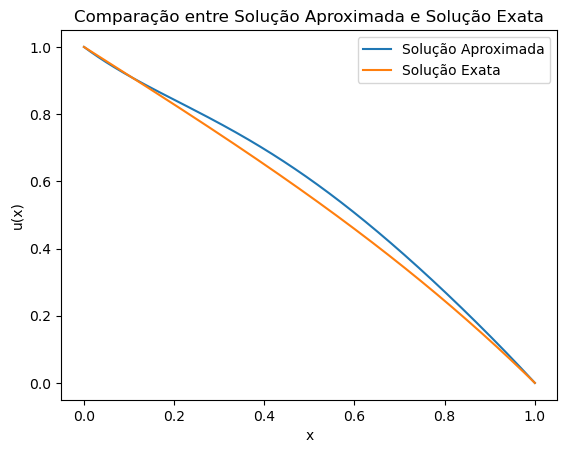

[[1.34292516 1.50610543 1.60424033]
 [1.50610543 1.80427434 2.00328792]
 [1.60424033 2.00328792 2.2885507 ]]
------------------------------------------------------------------
[ 1.          1.75918415 -2.30439514  1.00247409  0.        ]
------------------------------------------------------------------
[0.5 0.5 0.5]


In [3]:
# Definindo as funções da base
def Fi_1(i, x):
    if i==1:
      return 1-x
    else:
      return (x**i)*(1-x)

def DFi_1(i, x):
    return i*(1-x)**(i-1)

def Iaij(i,j):
    p=lambda x: DFi_1(i,x)*DFi_1(j,x)+Fi_1(i,x)*Fi_1(j,x)
    return p

def F_1(i):
  return lambda x: 1-x

def ue(x):
    return (1/(np.exp(-1)-np.exp(1)))*np.exp(x)-(1/(np.exp(-1)-np.exp(1)))*np.exp(-x)+1

def MetodoTrapezio(a, b, f):
   Area=(f(a)+f(b))*(b-a)/2
   return Area

def MetodoTrapezioComposto(c,d,N,f):
  h=1/N
  v=np.linspace(c,d,N)
  Area=0
  for i in range(0,N-1):
    Area=Area+MetodoTrapezio(v[i], v[i+1], f)
  return Area

n=int(5)
u=np.zeros(n)
A=np.zeros((n,n))
FA=np.zeros(n)
for i in range(1,n+1):
  for j in range(1,n+1):
    A[i-1,j-1]=MetodoTrapezioComposto(0,1,100,Iaij(i,j))

for i in range(1,n+1):
  FA[i-1]=MetodoTrapezioComposto(0,1,100,F_1(i))

u[0]=1
u[-1]=0
FA=FA[1:n-1]
A=A[1:n-1,1:n-1]
u[1:n-1]=x = np.linalg.solve(A, FA)

def uh(n, x):
    uh1 = np.zeros_like(x)
    for i in range(0,n):
        uh1 += u[i]*Fi_1(i+1, x)
    return uh1



x = np.linspace(0, 1, 1000)
u1 = uh(n, x)
y = ue(x)

plt.plot(x, u1, label='Solução Aproximada')
plt.plot(x, y, label='Solução Exata')
plt.title('Comparação entre Solução Aproximada e Solução Exata')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()
print(A)
print("------------------------------------------------------------------")
print(u)
print("------------------------------------------------------------------")
print(FA)

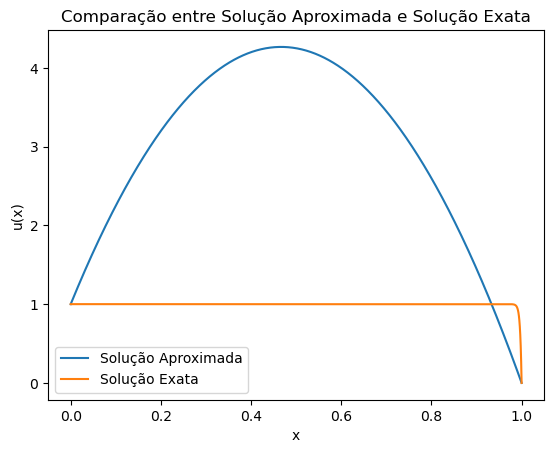

[[0.03334667]]
------------------------------------------------------------------
[ 1.        14.9940024  0.       ]
------------------------------------------------------------------
[0.5]


In [4]:
#### b)# Definindo as funções da base
def Fi_1(i, x):
    if i==1:
      return 1-x
    else:
      return (x**(i-1))*(1-x)

def DFi_1(i, x):
    return i*(1-x)**(i-1)

def Iaij(i,j):
    p=lambda x: 0.00001*DFi_1(i,x)*DFi_1(j,x)+Fi_1(i,x)*Fi_1(j,x)
    return p

def F_1(i):
  return lambda x: 1-x

def ue(x):
    return (1/(np.exp(-100*np.sqrt(10))-np.exp(100*np.sqrt(10))))*np.exp(100*np.sqrt(10)*x)-(1/(np.exp(-100*np.sqrt(10))-np.exp(100*np.sqrt(10))))*np.exp(-x)+1

def MetodoTrapezio(a, b, f):
   Area=(f(a)+f(b))*(b-a)/2
   return Area

def MetodoTrapezioComposto(c,d,N,f):
  h=1/N
  v=np.linspace(c,d,N)
  Area=0
  for i in range(0,N-1):
    Area=Area+MetodoTrapezio(v[i], v[i+1], f)
  return Area

n=int(3)
u=np.zeros(n)
A=np.zeros((n,n))
FA=np.zeros(n)
for i in range(1,n+1):
  for j in range(1,n+1):
    A[i-1,j-1]=MetodoTrapezioComposto(0,1,1000,Iaij(i,j))

for i in range(1,n+1):
  FA[i-1]=MetodoTrapezioComposto(0,1,1000,F_1(i))

u[0]=1
u[-1]=0
FA=FA[1:n-1]
A=A[1:n-1,1:n-1]
u[1:n-1]=x = np.linalg.solve(A, FA)

def uh(n, x):
    uh1 = np.zeros_like(x)
    for i in range(0,n):
        uh1 += u[i]*Fi_1(i+1, x)
    return uh1



x = np.linspace(0, 1, 1000)
u1 = uh(n, x)
y = ue(x)

plt.plot(x, u1, label='Solução Aproximada')
plt.plot(x, y, label='Solução Exata')
plt.title('Comparação entre Solução Aproximada e Solução Exata')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()
print(A)
print("------------------------------------------------------------------")
print(u)
print("------------------------------------------------------------------")
print(FA)

### Exercício 10

#### a)

Matriz A:
[[0.02333333 0.01166667 0.01166667 0.00583333]
 [0.01166667 0.00793651 0.00583333 0.00396825]
 [0.01166667 0.00583333 0.00793651 0.00396825]
 [0.00583333 0.00396825 0.00396825 0.00263039]]
Vetor F:
[0.34515402 0.17257701 0.17257701 0.0862885 ]
Coeficientes w:
[14.79231496  0.          0.          0.        ]
Solução aproximada u_h:
14.7923149595414*x*y*(x - 1)*(y - 1)


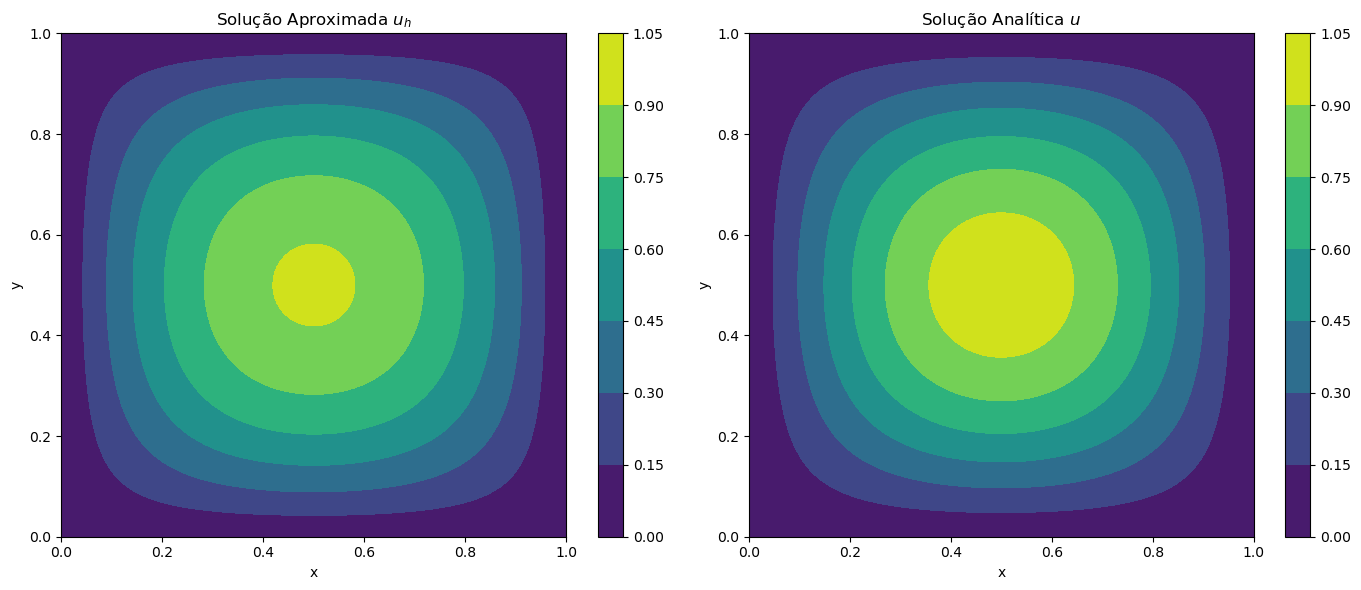

In [7]:
# Definir variáveis
x, y = sp.symbols('x y')

# Funções base fornecidas
phi1 = x * (x - 1) * y * (y - 1)
phi2 = x**2 * (x - 1) * y * (y - 1)
phi3 = x * (x - 1) * y**2 * (y - 1)
phi4 = x**2 * (x - 1) * y**2 * (y - 1)
phis = [phi1, phi2, phi3, phi4]

# Definir a função f(x, y)
f = (2 * sp.pi**2 + 1) * sp.sin(sp.pi * x) * sp.sin(sp.pi * y)

# Número de funções base
n = len(phis)

# Inicializar matriz A e vetor f
A = np.zeros((n, n))
F = np.zeros(n)

# Montar a matriz A e o vetor F usando integração simbólica
for i in range(n):
    for j in range(n):
        integrand_A = sp.diff(phis[i], x) * sp.diff(phis[j], x) + sp.diff(phis[i], y) * sp.diff(phis[j], y) + phis[i] * phis[j] # Calculando as derivadas parciais e montando o integrando
        A[i, j] = sp.integrate(sp.integrate(integrand_A, (x, 0, 1)), (y, 0, 1)) # Fazendo a integração dupla simbólica
    integrand_F = f * phis[i]
    F[i] = sp.integrate(sp.integrate(integrand_F, (x, 0, 1)), (y, 0, 1))# Calculando a integral dupla simbolicamente

# Resolver o sistema linear
w = np.linalg.solve(A, F)

# Construir a solução aproximada u_h
u_h = sum(w[i] * phis[i] for i in range(n))

# Imprimir os resultados
print(f"Matriz A:\n{A}")
print(f"Vetor F:\n{F}")
print(f"Coeficientes w:\n{w}")
print(f"Solução aproximada u_h:\n{u_h}")

##############################################################################################################################
## Plotando o Gráfico: ##

# Converter soluções simbólicas para funções lambda para avaliação numérica
u_h_func = sp.lambdify((x, y), u_h, 'numpy')
u_exact_func = sp.lambdify((x, y), sp.sin(sp.pi * x) * sp.sin(sp.pi * y), 'numpy')

# Definir uma grade de pontos para avaliação
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_h = u_h_func(X, Y)
U_exact = u_exact_func(X, Y)

# Plotar contornos das soluções aproximada e exata
plt.figure(figsize=(14, 6))

# Contornos da solução aproximada
plt.subplot(1, 2, 1)
contour_uh = plt.contourf(X, Y, U_h, cmap='viridis')
plt.colorbar(contour_uh)
plt.title('Solução Aproximada $u_h$')
plt.xlabel('x')
plt.ylabel('y')

# Contornos da solução exata
plt.subplot(1, 2, 2)
contour_ue = plt.contourf(X, Y, U_exact, cmap='viridis')
plt.colorbar(contour_ue)
plt.title('Solução Analítica $u$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

#### b)

Matriz A:
[[5.1848022]]
Vetor F:
[5.1848022]
Coeficientes w:
[1.]
Solução aproximada u_h:
1.0*sin(pi*x)*sin(pi*y)


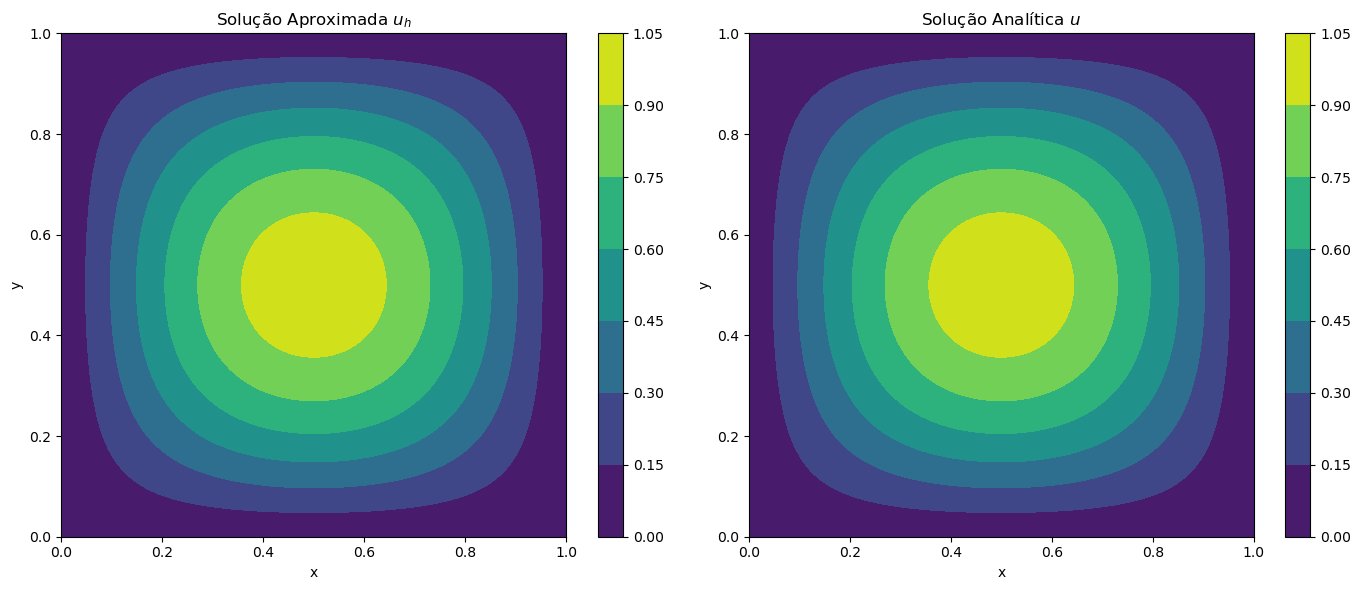

In [14]:
# Definir variáveis
x, y = sp.symbols('x y')

# Funções base fornecidas
phi1 = sp.sin(sp.pi*x) * sp.sin(sp.pi*y)
phis = [phi1]

# Definir a função f(x, y)
f = (2 * sp.pi**2 + 1) * sp.sin(sp.pi * x) * sp.sin(sp.pi * y)

# Número de funções base
n = len(phis)

# Inicializar matriz A e vetor f
A = np.zeros((n, n))
F = np.zeros(n)

# Montar a matriz A e o vetor F usando integração simbólica
for i in range(n):
    for j in range(n):
        integrand_A = sp.diff(phis[i], x) * sp.diff(phis[j], x) + sp.diff(phis[i], y) * sp.diff(phis[j], y) + phis[i] * phis[j] # Calculando as derivadas parciais e montando o integrando
        A[i, j] = sp.integrate(sp.integrate(integrand_A, (x, 0, 1)), (y, 0, 1)) # Fazendo a integração dupla simbólica
    integrand_F = f * phis[i]
    F[i] = sp.integrate(sp.integrate(integrand_F, (x, 0, 1)), (y, 0, 1))# Calculando a integral dupla simbolicamente

# Resolver o sistema linear
w = np.linalg.solve(A, F)

# Construir a solução aproximada u_h
u_h = sum(w[i] * phis[i] for i in range(n))

# Imprimir os resultados
print(f"Matriz A:\n{A}")
print(f"Vetor F:\n{F}")
print(f"Coeficientes w:\n{w}")
print(f"Solução aproximada u_h:\n{u_h}")

##############################################################################################################################
## Plotando o Gráfico: ##

# Converter soluções simbólicas para funções lambda para avaliação numérica
u_h_func = sp.lambdify((x, y), u_h, 'numpy')
u_exact_func = sp.lambdify((x, y), sp.sin(sp.pi * x) * sp.sin(sp.pi * y), 'numpy')

# Definir uma grade de pontos para avaliação
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
U_h = u_h_func(X, Y)
U_exact = u_exact_func(X, Y)

# Plotar contornos das soluções aproximada e exata
plt.figure(figsize=(14, 6))

# Contornos da solução aproximada
plt.subplot(1, 2, 1)
contour_uh = plt.contourf(X, Y, U_h, cmap='viridis')
plt.colorbar(contour_uh)
plt.title('Solução Aproximada $u_h$')
plt.xlabel('x')
plt.ylabel('y')

# Contornos da solução exata
plt.subplot(1, 2, 2)
contour_ue = plt.contourf(X, Y, U_exact, cmap='viridis')
plt.colorbar(contour_ue)
plt.title('Solução Analítica $u$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.savefig("//home//ted_kaczynski//Downloads//M10_2.png")
plt.show()